<a href="https://colab.research.google.com/github/CoreTheGreat/HBPU-Machine-Learning-Course/blob/main/ML_Chapter3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第三章：分类
湖北理工学院《机器学习》课程NoteBook

学生：吴兴平

笔记内容概述: 精确率 Precision、召回率 Recall、F1 Score


## Step 1: 数据准备

使用make_moons生成虚拟数据构建分类任务

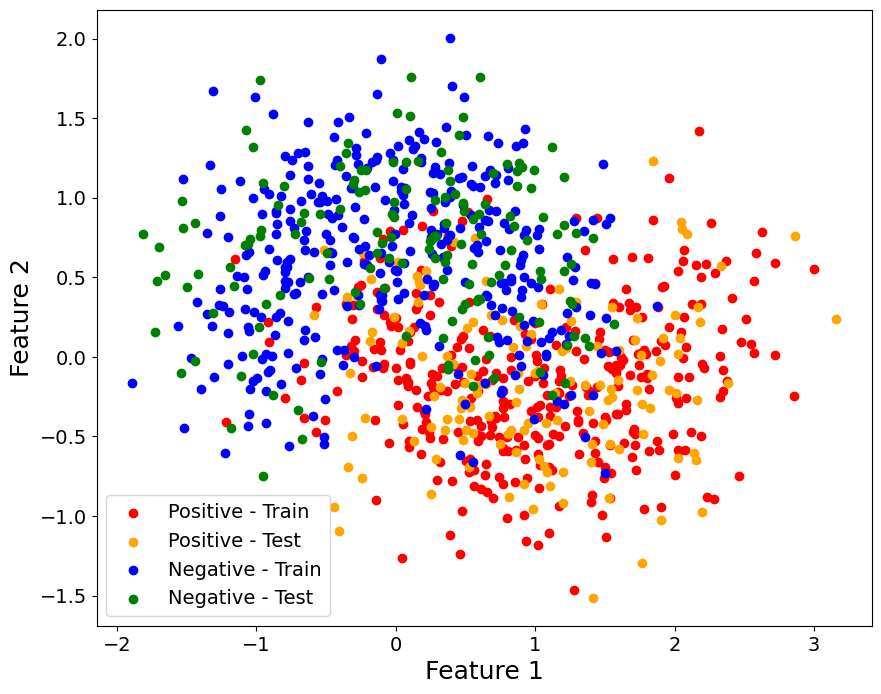

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

label_size = 18 # Label size
ticklabel_size = 14 # Tick label size

# Generate moon-shaped data
X, Y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Split X and Y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Positive - Train')
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Positive - Test')
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Negative - Train')
ax.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='green', label='Negative - Test')
ax.set_xlabel('Feature 1', fontsize=label_size)
ax.set_ylabel('Feature 2', fontsize=label_size)

ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)

# Set legend fontsize
plt.legend(prop={'size': 14})

plt.show()

## Step 2: 使用逻辑回归和SVM进行分类，输出概率

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model Definition
mdl_lr = LogisticRegression() # Logistic Regression
mdl_svm = SVC(probability=True) # Support Vector Machine, set probability to draw P-R Curve

# Model Training
mdl_lr.fit(X_train, y_train) # Logistic Regression
print('Logistic regression model trained successfully...')

mdl_svm.fit(X_train, y_train) # Support Vector machine
print('Support vector machine trained successfully...')

# Get confusion matrix of all models
# Predict probabilities for each model
y_proba_lr = mdl_lr.predict_proba(X_test)[:, 1] # Using probability of positive class
y_proba_svm = mdl_svm.predict_proba(X_test)[:, 1]

Logistic regression model trained successfully...
Support vector machine trained successfully...


## Step 3: 调整阈值，改变精确率和召回率

In [6]:
def confusion_matrix(y_pred, y):
    '''
    y_pred - predict classes
    y - actual classes
    '''
    # Get the number of classes
    n_classes = len(np.unique(y))
    
    # Initialize the confusion matrix with zeros
    cm = np.zeros((n_classes, n_classes))
    
    # Fill the confusion matrix
    for pred, actual in zip(y_pred, y):
        cm[pred][actual] += 1
    
    return cm

def get_prediction_from_proba(y_proba, threshold=0.5):
    '''
    y_proba - predict probabilities
    threshold - threshold of probability
    
    y_pred - predict classes, y_proba > threshold is positive, otherwise negative
    '''
    y_pred = np.where(y_proba > threshold, 1, 0)
    return y_pred

In [8]:
def get_precision_recall_f1(y_pred, y):
    '''
    Compute precision, recall, and F1 score of binary classification
    y_pred - predict classes
    y - actual classes
    '''
    epsilon = 1e-10
    
    # Compute confusion matrix
    cm = confusion_matrix(y_pred, y)
    
    # Compute precision, recall, and F1 score
    precision = cm[1, 1] / (cm[1, 1] + cm[1,0] + epsilon)
    recall = cm[1, 1] / (cm[1, 1] + cm[0, 1] + epsilon)
    f1 = 2 * (precision * recall) / (precision + recall + epsilon)
    
    return precision, recall, f1

# Get predictions from probabilities
for threshold in np.linspace(0, 1, 11):
    y_pred_lr = get_prediction_from_proba(y_proba_lr, threshold)
    precision_lr, recall_lr, f1_lr = get_precision_recall_f1(y_pred_lr, y_test)
    print(f"When threshold = {threshold:0.1f} - Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1 Score: {f1_lr:.4f}")

print(confusion_matrix(y_pred_lr, y_test))

When threshold = 0.0 - Precision: 0.4800, Recall: 1.0000, F1 Score: 0.6486
When threshold = 0.1 - Precision: 0.5934, Recall: 0.9931, F1 Score: 0.7429
When threshold = 0.2 - Precision: 0.6900, Recall: 0.9583, F1 Score: 0.8023
When threshold = 0.3 - Precision: 0.7247, Recall: 0.8958, F1 Score: 0.8012
When threshold = 0.4 - Precision: 0.7654, Recall: 0.8611, F1 Score: 0.8105
When threshold = 0.5 - Precision: 0.8176, Recall: 0.8403, F1 Score: 0.8288
When threshold = 0.6 - Precision: 0.8382, Recall: 0.7917, F1 Score: 0.8143
When threshold = 0.7 - Precision: 0.9130, Recall: 0.7292, F1 Score: 0.8108
When threshold = 0.8 - Precision: 0.9375, Recall: 0.6250, F1 Score: 0.7500
When threshold = 0.9 - Precision: 1.0000, Recall: 0.3750, F1 Score: 0.5455
When threshold = 1.0 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
[[156. 144.]
 [  0.   0.]]


### Step 4: 调整Threshold，绘制P-R曲线图

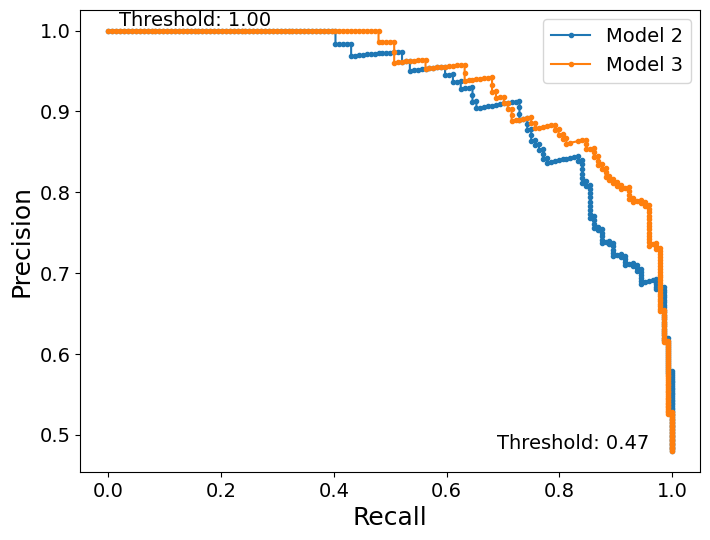

In [10]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for various thresholds
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_proba_lr)
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_proba_svm)

# Create the P-R curve of Logistic Regression and Support Vector Machine
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(recall_lr, precision_lr, marker='.', color='tab:blue', label='Model 2')
ax.plot(recall_svm, precision_svm, marker='.', color='tab:orange', label='Model 3')
ax.set_xlabel('Recall', fontsize=label_size)
ax.set_ylabel('Precision', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)
plt.legend(fontsize=ticklabel_size)

# Add some threshold annotations of Logistic Regression
for i in [0, int(len(thresholds_lr)/2), len(thresholds_lr)-1]:
    plt.annotate(f'Threshold: {thresholds_lr[i]:.2f}', 
                    xy=(recall_lr[i]*0.8, thresholds_lr[i]), 
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=ticklabel_size)

plt.savefig('P-R_Curve.png', dpi=300)
plt.show()

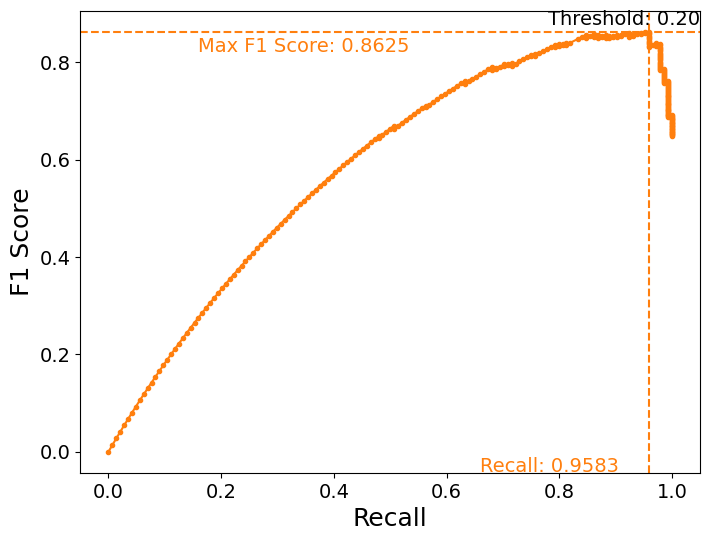

In [12]:
# Calculate F1 scores for SVM model
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)

# Drawing a curve with Recall as x-axis and F1-score as y-axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(recall_svm, f1_svm, marker='.', color='tab:orange', label='Model 3')
ax.set_xlabel('Recall', fontsize=label_size)
ax.set_ylabel('F1 Score', fontsize=label_size)
ax.tick_params(axis='both', which='major', labelsize=ticklabel_size)

# Add some threshold annotations of SVM where F1-score is maximum
max_f1_index = np.argmax(f1_svm)
plt.annotate(f'Threshold: {thresholds_svm[max_f1_index]:.2f}', 
                    xy=(recall_svm[max_f1_index]*0.8, f1_svm[max_f1_index]), 
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=ticklabel_size)

# Adding a dashed line to indicate the maximum F1 score
plt.axvline(x=recall_svm[max_f1_index], color='tab:orange', linestyle='--')
plt.axhline(y=f1_svm[max_f1_index], color='tab:orange', linestyle='--')

# Adding text annotations for maximum F1 score
plt.text(recall_svm[max_f1_index]-0.8, f1_svm[max_f1_index]-0.05, f'Max F1 Score: {f1_svm[max_f1_index]:.4f}', 
         horizontalalignment='left', verticalalignment='bottom', fontsize=ticklabel_size, color='tab:orange')

# Adding text annotations below x-axis of Recall where F1-score is maximum
plt.text(recall_svm[max_f1_index]-0.3, -0.05, f'Recall: {recall_svm[max_f1_index]:.4f}', 
         horizontalalignment='left', verticalalignment='bottom', fontsize=ticklabel_size, color='tab:orange')

plt.savefig('F1_Curve.png', dpi=300)
plt.show()